By 

#### Bernardo Vimpi
May 2020

#### MARKET SEGMENTATION AND CLUSTER ANALYSIS

#### PROJECT OBJECTIVES AND SCOPE

In this project I exploter Kmeans clustering for a small dataset of customers's satisfaction and loyalty. I first segment the customers into 2 major clusters and then explore the sub-clusters available within the two major clusters. I also fruther analyze the clusters using the Elbow Method and incrementing the value of kmean cluster from 1,2,3 and 4 and draw conclusions based on the output. 

###### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

##### DATA LOAD

In [2]:
data = pd.read_csv('3.12. Example.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


##### DATASET AND VARIABLE EXPLANATIONS

We have 30 different observations. Each observation is a client and we have a score for their satisfaction and loyalty. Satisfaction is self-reported by asking the customer to rank their satisfaction from 1 to 10 with 1 being the Not Satisfied and 10 being Extremely Satisfied. Thus, "Satisfaction" is a discrete variable that takes interger values in range of 1 to 10. Brand loyalty, which is hard to measure, is based on different measure such as churn rate, retention rate, or customer lifetime value(CLV). In this dataset Brand Loyalty was measured based on purchases for 1 year or more and other factors as well. The measure for Brand Loyalty falls in the range of -2.5 to 2.5.

##### DATA PLOT

Text(0, 0.5, 'Loyalty')

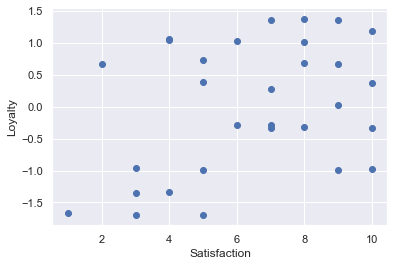

In [3]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

We can easely identify two major clusters by a taking a quick glimpse of the above plotted graph.  However, the 2 clusters solution won't be of much help for our analysis. Thus, we can further our analysis by dividing the grapth into 4 different squares of clusters: 
(a) Low Satisfaction and Low Loyalty
(b) Low Satisfaction High Loyalty
(c) High Satisfaction and Low Loyalty
(d) High Satisfaction and High Loyalty

#### FEATURE SELECTION

In [4]:
x=data.copy()

#### CLUSTERING

In [5]:
kmeans =KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### CLUSTERING THE RESULTS

In [6]:
clusters=x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

#### DATA PLOT

Text(0, 0.5, 'Loyalty')

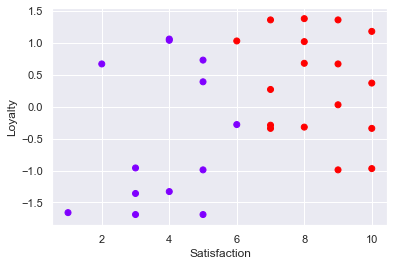

In [7]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

### Results and Analysis

We see 2 major clusters and at the satisfaction value of 6, we do have a cuttoff line. That devides the data into two clusters: one on the right, and the other one on the left. This may make sense to some but there is an issue here: Most likely the algorithm only considered the satisfaction as a feature. The satisfaction values are much higher than those of the loyalty and kmeans roughly disregarded Loyalty as a feature. When the analysis is based on a single feature, the results will look like this. This is also an indication that something is going on and additional analysis is needed. Moreover, for Market segmentation, both Satisfaction and Loyalty are equally important features. How tp fix this issue.  We use SKlean and Standardize "Satisfaction".

### STANDARDIZING THE FEATURES

In [8]:
from sklearn import preprocessing
x_scaled =preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

### USING THE ELBOW METHOD

In [9]:
wcss =[]

for i in range(1,10):
    kmeans =KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.363006425346784,
 4.593092154075061,
 3.731185392455718]

### PLOTTING THE ELBOW METHOD

Text(0, 0.5, 'WCSS')

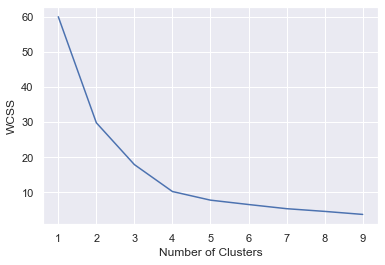

In [10]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

There are several elbows we can spot on the graph: at 2,3,4 and 5 clusters. We also can change the number of WCC but it is unclear whic solution is the best in this case. Lets explore with the standardized variables which number of clusters could be the best one.

##### Exploring clustering solutions and selecting the number of clusters.

In [11]:
kmeans_new =KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new =x.copy()
clusters_new ['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


The above output contains the original values but the predicted cluster contains the solution based on the standardized data. Thus, we can plot the data without standardarzing the AXES but the solution will be the standardized one.Lets plot the data

### DATA PLOT

Text(0, 0.5, 'Loyalty')

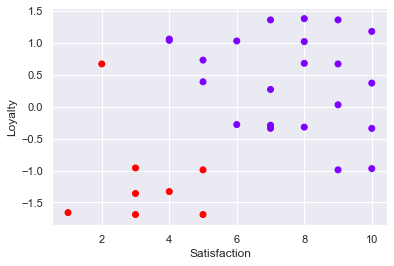

In [12]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

We can see two clusters since we specified the number of clusters to be 2. What is different here is the clusters themseves: comparing this to the previous one, we can clearly see that both dimentions were taken into account. Also, these two clusters coinside with our initial speculations they would be the result of k=2. Although we are satisfied with the results of standardization, the actual problem is not solved yet because this 2 clusters solutions does not really make a lot of sense. One cluster (the one in red color) has people with low loyalty and low satisfaction, lets call the "Alienated; the other cluster seems very heterogenious and we can call it "Everything Else".

#### HOW TO IMPROVE OUR CLUSTER? 

The analysis above is based on k=2 clusters. The easiest way to evaluate our clusters is by simply changing the number os clusters specified earlier, to 1, 2,3, 4 or 5. I will run the code once again to eveluate this.  

##### Exploring clustering solutions and selecting the number of clusters  with k=3.

In [13]:
kmeans_new =KMeans(3)# I changed the number of clusters here
kmeans_new.fit(x_scaled)
clusters_new =x.copy()
clusters_new ['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


#### DATA PLOT

Text(0, 0.5, 'Loyalty')

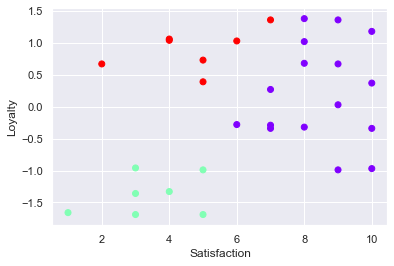

In [14]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Using k=3 clusters we have a different picture: We have the Alienated (light green) and a different group (in red) and we can call them "Supporters" who are not particularty happy with the shopping experience but they like the brand and want to keep coming back. Also, note that there aren't many of them since its a small cluster. We also have the third cluster (i red) and call it "All that is left" and we can't really name it since its still very mixed. Lets run for 4 clusters solution next. 

##### Exploring clustering solutions and selecting the number of clusters  with k=4

In [15]:
kmeans_new =KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new =x.copy()
clusters_new ['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,3
9,8,0.68,3


#### DATA PLOT

Text(0, 0.5, 'Loyalty')

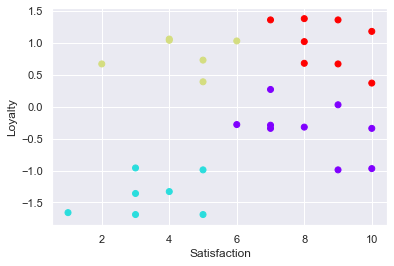

In [16]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

We have the  "Alianated" and "Saporters" cluster and now we have two distict ones too: The upper right consists of clients that are satisfied and loyal, lets call them "Fans" The lower right we have customers that are predominately satisfied but also some, in the same group, are not so much loyal. Lets call them "Roamers". This solution seems to be the best so far. What is we try with 5? 

##### Exploring clustering solutions and selecting the number of clusters  with k=5

In [17]:
kmeans_new =KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new =x.copy()
clusters_new ['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,4
1,6,-0.28,1
2,5,-0.99,4
3,7,-0.29,1
4,4,1.06,3
5,1,-1.66,4
6,10,-0.97,2
7,8,-0.32,1
8,8,1.02,0
9,8,0.68,0


##### DATA PLOT

Text(0, 0.5, 'Loyalty')

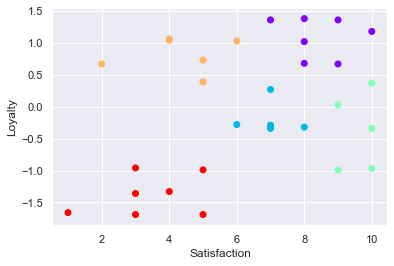

In [18]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Here, the "Alienated" and the "Supporters" remain unchanged. The ones located in the midd-right cluster, seem to have the same characteristics as the 'Roamers". Finallt, the clients represented by the purple clusters, are right in the middle of the standardized grapth. They are almost neutral on the Loyalty feature but they are generally satisfied. They are also "Roamers". Therefore, this solution splits the "Roamers" into 2 sub-clusters: those that are extremely satisfied, and those that are just satisfied. Thus, there isn't much value added to our segmentation here and we can carry on with as many clusters as we like byr from  ow on, we would just further segment the 4 core clusters.

###### CLUSTER ANALYSIS

How do we further analyze the data from cluster? There are different types of analysis:

A. Exploratory Analysis: Here we get acquinted with the data, seach for pattersn and make plans. The different ways to get acquinted with the data are Data Visualization, Descriptive Statistics and Clustering.

B. Confirmatory Analysis: Aims at explaing a phenomenon, confirm a hypothesis and validate previous research using hypothesis testing and regression analysis.

C. Explanatory: this analysis is used to explore past analysis.


In our case, our marget segmentation is an example of exploratory analaysis.

Thank you
#### Bernardo Vimpi
May 2020
